_Author: A. Spiga_

In [1]:
import numpy as np
import apss_lib 
import ppplot
%matplotlib inline

2019-12-17 21:37:23.453916


In [2]:
dasols = [19,47,139]
datatabp  = [apss_lib.getsol(sol,reload=False,var="PRE",distant=True) for sol in dasols]
datatabt = [apss_lib.getsol(sol,reload=False,var="HWS",distant=True) for sol in dasols]

APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0019_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0047_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0139_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//twins_model_0019_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//twins_model_0047_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//twins_model_0139_01.npy


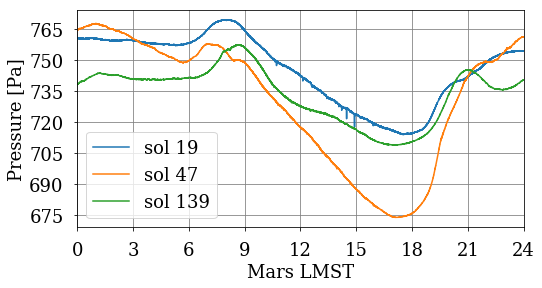

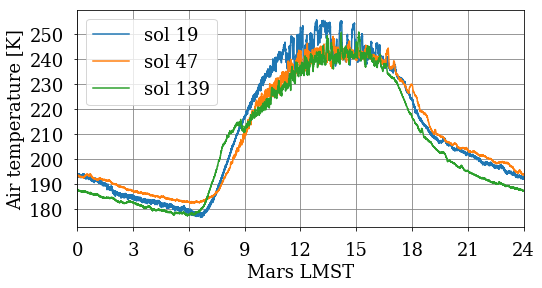

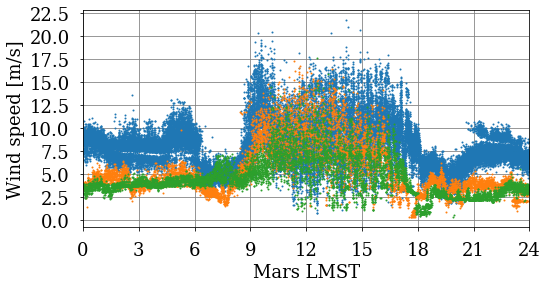

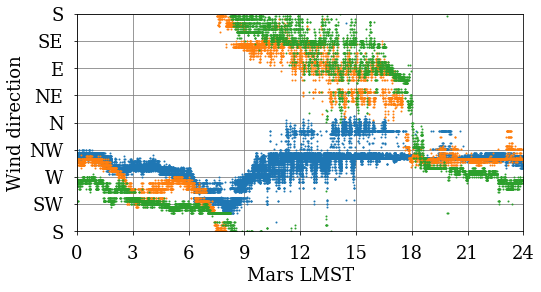

In [3]:
for var in ["PRE","PAT","HWS","WD"]:
    
    if var == "PRE": 
        lab = 'Pressure [Pa]' ; tit = 'Pressure'
        mark,lin = "","-"
        datatab = datatabp
    elif var == "PAT": 
        lab = 'Air temperature [K]' ; tit = 'Air temperature'
        mark,lin = "","-"
        datatab = datatabt
    elif var == "HWS": 
        lab = 'Wind speed [m/s]' ; tit = 'Wind speed'
        mark,lin = ".",""
        datatab = datatabt
    elif "WD" in var: 
        lab = 'Wind direction' ; tit = 'Wind direction'
        mark,lin = ".",""
        datatab = datatabt
        
    fig = ppplot.figuref(x=8,y=4)
    pl = ppplot.plot1d(fig=fig)
    ppplot.changefont(18)
    count = 0
    for data in datatab:
        f,x = apss_lib.plotvar(data,code=[var],timetype="LMST",isplot=False)
        pl.f, pl.x = f,x
        pl.marker = mark
        pl.linestyle = lin
        pl.ylabel = lab
        #pl.title = tit
        pl.xlabel = "Mars LMST"
        pl.xmin = 0
        pl.xmax = 24
        pl.nxticks = 8
        if var in ["PRE","PAT"]:
            pl.legend = "sol %i" % (dasols[count])
        count += 1
        
        if "WD" in var:
            pl.ymin = -180
            pl.ymax = +180

        if var in ["HWS"]:
            pl.fmt = "%.1f"

            
        pl.make()
        
        if "WD" in var:
            import matplotlib.pyplot as mpl
            ax = mpl.gca()
            from matplotlib.ticker import FixedLocator, FixedFormatter
            y_formatter = FixedFormatter(["N", "NE", "E", "SE", "S", "SW", "W", "NW", "S"])
            y_locator = FixedLocator([0, 45, 90, 135, 180, -135, -90, -45, -180])
            ax.yaxis.set_major_formatter(y_formatter)
            ax.yaxis.set_major_locator(y_locator)
    ppplot.save(filename="sol"+var,mode="pdf")